* versions 
>version 1 with fixed lr densenet  val =98 , efficient val=97 with batch size 16 better result<br/>
> version 2 strat with LearningRateScheduler with 20 and 30 with batch size 16<br/>
> version 3 with LearningRateScheduler 50 epochs and scans size is 300 x 300 with batch size 16<br/>
>version 4 with LearningRateScheduler 20 epochs and scans size is 300 x 300 with batch size 8 eith efficient 20layer<br/>

# import libraries


In [1]:
import os
import cv2
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt 
from random import shuffle , seed
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications   import EfficientNetB3
from tensorflow.keras.applications.densenet import DenseNet201 
from tensorflow.keras.layers import Input ,concatenate, Dense,Flatten ,Conv2D ,Dropout ,MaxPool2D , GlobalAveragePooling2D 

# Read data And Explore data

In [2]:
#read
data_path="../input/brain-tumor-classification-mri/Training"
folders=os.listdir(data_path)
print ("classes : ", folders)


# configration lists for read in it
glioma_tumor_scans=[]
glioma_tumor_labels=[]

meningioma_tumor_scans=[]
meningioma_tumor_labels=[]

pituitary_tumor_scans=[]
pituitary_tumor_labels=[]


non_tumor_scans=[]
non_tumor_labels=[]

classes :  ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [3]:
# read brain glioma tumor scans
glioma_tumor_scans,glioma_tumor_labels=[cv2.imread(data_path+"/glioma_tumor/"+image) for image in tqdm(os.listdir(data_path+"/glioma_tumor"))],["Glioma Tumor" for image in tqdm(os.listdir(data_path+"/glioma_tumor"))]
print("brain glioma tumor scans number : ", len(glioma_tumor_scans))
print("brain glioma tumor labels number : ", len(glioma_tumor_labels))
 


100%|██████████| 826/826 [00:00<00:00, 345103.61it/s]

brain glioma tumor scans number :  826
brain glioma tumor labels number :  826


In [4]:
# read brain meningioma tumor scans
meningioma_tumor_scans,meningioma_tumor_labels=[cv2.imread(data_path+"/meningioma_tumor/"+image) for image in tqdm(os.listdir(data_path+"/meningioma_tumor"))],["Meningioma Tumor" for image in tqdm(os.listdir(data_path+"/meningioma_tumor"))]
print("brain meningioma tumor scans number : ", len(meningioma_tumor_scans))
print("brain meningioma tumor labels number : ", len(meningioma_tumor_labels))


100%|██████████| 822/822 [00:00<00:00, 389001.23it/s]

brain meningioma tumor scans number :  822
brain meningioma tumor labels number :  822


In [5]:
# read brain tumor scans
pituitary_tumor_scans,pituitary_tumor_labels=[cv2.imread(data_path+"/pituitary_tumor/"+image) for image in tqdm(os.listdir(data_path+"/pituitary_tumor"))],["Pituitary Tumor" for image in tqdm(os.listdir(data_path+"/pituitary_tumor"))]
print("brain pituitary tumor scans number : ", len(pituitary_tumor_scans))
print("brain pituitary tumor labels number : ", len(pituitary_tumor_labels))


100%|██████████| 827/827 [00:00<00:00, 384725.98it/s]

brain pituitary tumor scans number :  827
brain pituitary tumor labels number :  827


In [6]:
# read non tumor scans
non_tumor_scans , non_tumor_labels=[cv2.imread(data_path+"/no_tumor/"+image) for image in tqdm(os.listdir(data_path+"/no_tumor"))], ["Non Tumor" for image in tqdm(os.listdir(data_path+"/no_tumor"))]
print("non tumor scans number : ", len(non_tumor_scans))
print("non tumor labels number : ", len(non_tumor_labels))


100%|██████████| 395/395 [00:00<00:00, 212213.41it/s]

non tumor scans number :  395
non tumor labels number :  395


Text(0.5, 1.0, 'Pituitary Tumor')

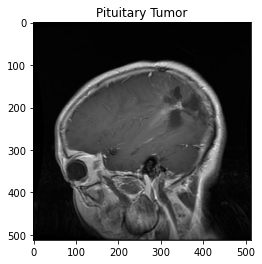

In [7]:
plt.imshow(glioma_tumor_scans[0])
plt.title(pituitary_tumor_labels[0])

In [8]:
#function to show images
def image_show(data, labels , number_of_image ):
    #to generate a random numbers
    numbers=np.random.randint(0,len(data),number_of_image)
    plt.figure(figsize=(30,20))
    j = number_of_image/10
    for _,i in enumerate(numbers):
        plt.subplot(j,10,_+1)
        plt.imshow(data[i])
        plt.title(labels[i]+"\n"+f"size {data[i].shape}")
        #to remove the number that appear around image
        plt.xticks([]),plt.yticks([])
    plt.show()



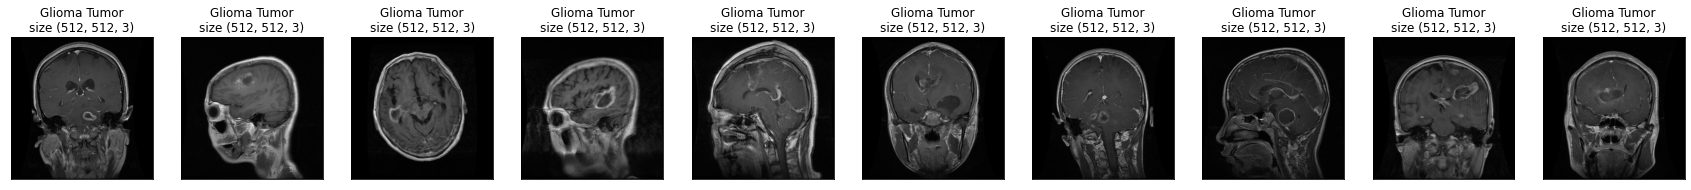

In [9]:
# show sample for  glioma_tumor_scans
image_show(glioma_tumor_scans,glioma_tumor_labels ,10)

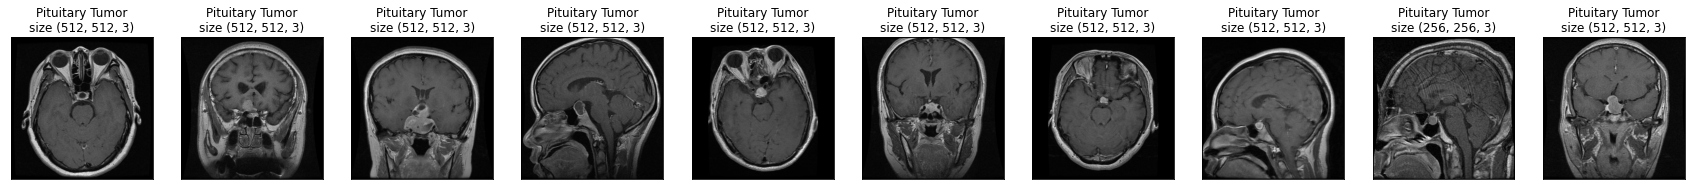

In [10]:
# show sample for non tumor scan
image_show(pituitary_tumor_scans,pituitary_tumor_labels ,10)

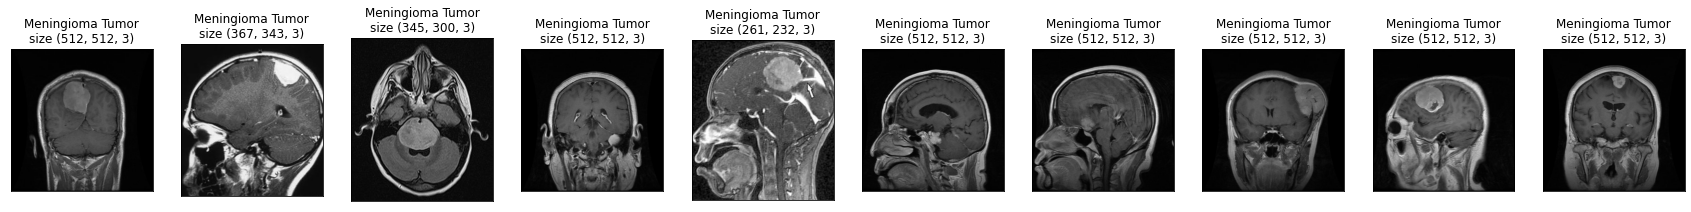

In [11]:
# show sample for  glioma_tumor_scans
image_show(meningioma_tumor_scans,meningioma_tumor_labels ,10)

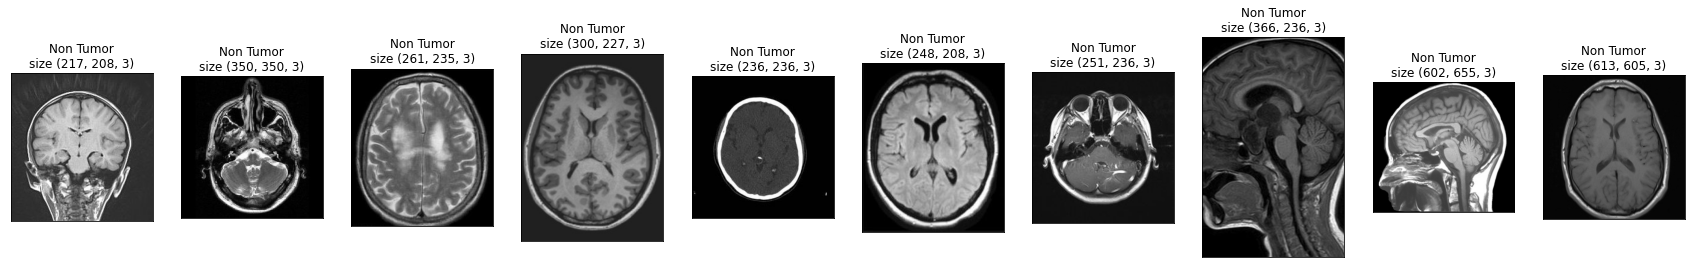

In [12]:
# show sample for non tumor scan
image_show(non_tumor_scans,non_tumor_labels ,10)

# resize images

first after show these images , we can resize the all of these image in the same size

In [13]:
# global image size
ImageSize=300

#resize tumor scans
glioma_tumor_scans=[cv2.resize(image, (ImageSize,ImageSize)) for image in glioma_tumor_scans]


#resize tumor scans
meningioma_tumor_scans=[cv2.resize(image, (ImageSize,ImageSize)) for image in meningioma_tumor_scans]


#resize tumor scans
pituitary_tumor_scans=[cv2.resize(image, (ImageSize,ImageSize)) for image in pituitary_tumor_scans]


#resize non tumor scans
non_tumor_scans=[cv2.resize(image, (ImageSize,ImageSize)) for image in non_tumor_scans]

# combine scans

In [14]:
#prepare Dataset

Scans=[]
Labels=[]


#combine scans
Scans.extend(glioma_tumor_scans)
Scans.extend(meningioma_tumor_scans)
Scans.extend(pituitary_tumor_scans)
Scans.extend(non_tumor_scans)

#combine labels
Labels.extend(glioma_tumor_labels)
Labels.extend(meningioma_tumor_labels)
Labels.extend(pituitary_tumor_labels)
Labels.extend(non_tumor_labels)

#converte to array 
Scans=np.array(Scans)
Labels=np.array(Labels)


print("Scans shape: ", Scans.shape)
print("Labels shape: ", Labels.shape)


Scans shape:  (2870, 300, 300, 3)
Labels shape:  (2870,)


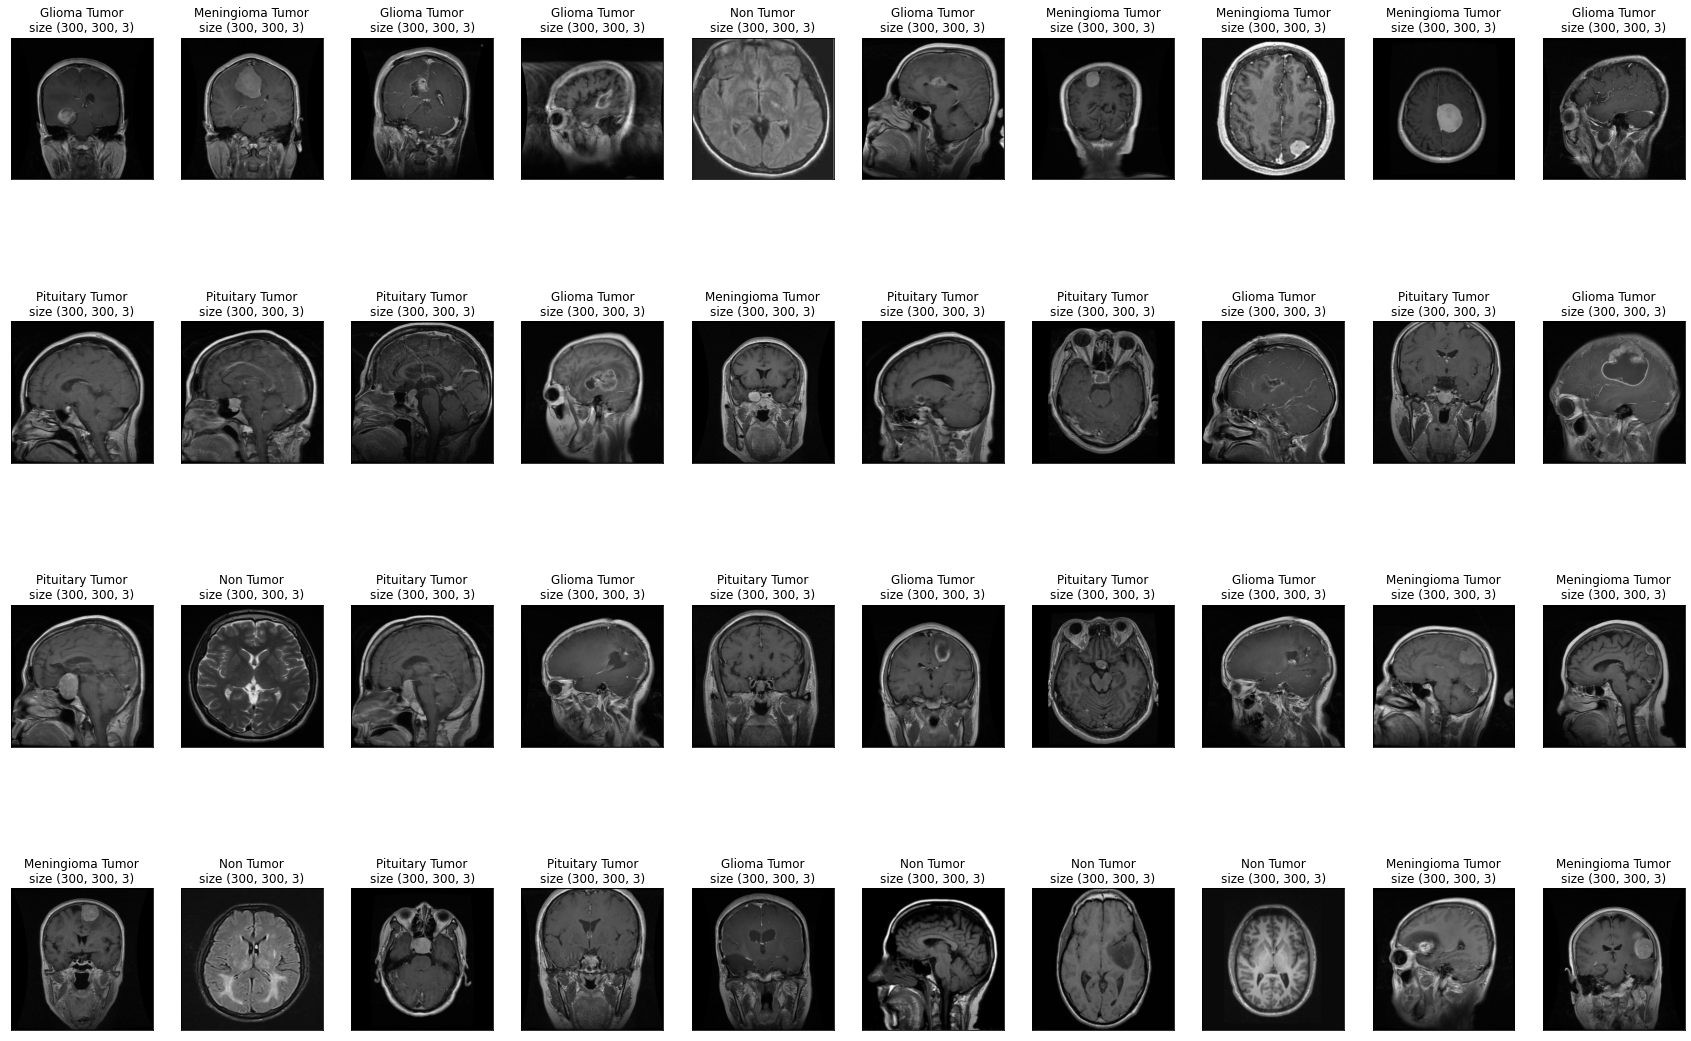

In [15]:
#### show scans after resized
# show sample for  tumor scan
image_show(Scans,Labels ,40)



In [16]:
classes={0:"Non Tumor" , 1:"Glioma Tumor" , 2:"Meningioma Tumor" , 3:"Pituitary Tumor"}
#function to get code by name 
def get_code(name):
    for key , value in classes.items():
        if value ==name:
            break
    return key

#function to get name by code
def get_class(key):
    return classes[key]


#test
print("Non Tumor :", get_code("Non Tumor"))
print("0 :" ,get_class(0))

print("Tumor :", get_code("Tumor"))
print("1 :" ,get_class(1))



Non Tumor : 0
0 : Non Tumor
Tumor : 3
1 : Glioma Tumor


In [1]:
#labels configuration

Labels=[get_code(label) for label in Labels]
Labels

# Let's see graph if there is balance in the data or not

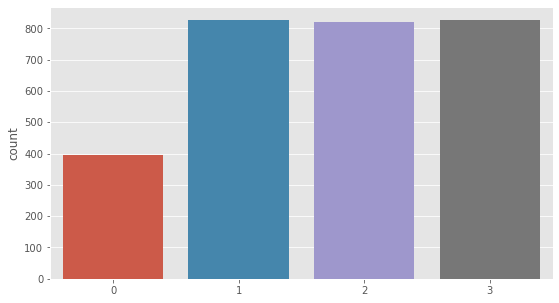

In [18]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(Labels)
plt.show()

بعد ما شفت عدم توازن في عينات الطبيعيه , انا هضيف داتا سيت تانيه عشان يحصل عندي توازن بشكل عظيم 

In [19]:
# read other non tumor scans
other_non_tumor_scans , other_non_tumor_labels=[cv2.resize(cv2.imread("../input/brain-mri-images-for-brain-tumor-detection/no/"+image),(ImageSize,ImageSize)) for image in tqdm(os.listdir("../input/brain-mri-images-for-brain-tumor-detection/no"))], ["Non Tumor" for image in tqdm(os.listdir("../input/brain-mri-images-for-brain-tumor-detection/no/"))]
print("other non tumor scans number : ", len(other_non_tumor_scans))
print("other non tumor labels number : ", len(other_non_tumor_labels))

100%|██████████| 98/98 [00:00<00:00, 61194.25it/s]

other non tumor scans number :  98
other non tumor labels number :  98


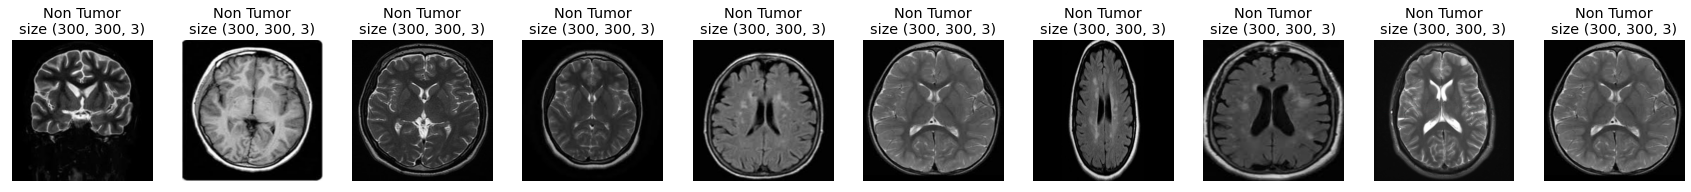

In [20]:
# show sample for  other tumor scan
image_show(other_non_tumor_scans,other_non_tumor_labels ,10)

add other non tumor to original non tumor scans

In [21]:
Scans=list(Scans) +other_non_tumor_scans
Scans=np.array(Scans)

# add labels and converte other non tumor labels to categroical
Labels=list(Labels)+ [get_code(label) for label in other_non_tumor_labels]

Labels=np.array(Labels)


print("Scans shape: ", Scans.shape)
print("Labels shape: ", Labels.shape)

Scans shape:  (2968, 300, 300, 3)
Labels shape:  (2968,)


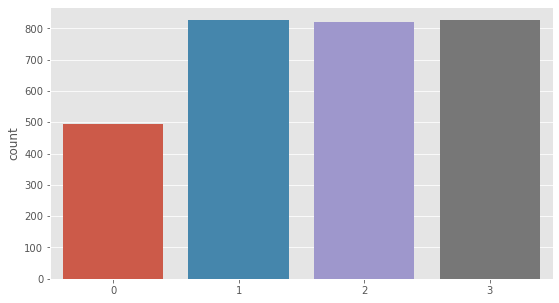

In [22]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(Labels)
plt.show()

should converte this labels to Categorical

In [23]:
import tensorflow as tf
Labels=tf.keras.utils.to_categorical(Labels, num_classes=4, dtype='float32')
Labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Split dataset

In [24]:
#split all data to train and test
x_train, x_val, y_train  , y_val=train_test_split(Scans, Labels,test_size=0.05 , shuffle=True , stratify=Labels)

print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)


print("x val shape: ", x_val.shape)
print("y val shape: ", y_val.shape)

x train shape:  (2819, 300, 300, 3)
y train shape:  (2819, 4)
x val shape:  (149, 300, 300, 3)
y val shape:  (149, 4)


# **Preprocessing on the images**

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator=ImageDataGenerator(
        samplewise_std_normalization=True,
        samplewise_center=True,
        rotation_range=90
,fill_mode='nearest')

batch_size=8                                               
train_generator=generator.flow(x_train,y_train ,batch_size=batch_size)
val_generator=generator.flow(x_val,y_val)

In [26]:
#get data for generator
train_scans=train_generator.__getitem__(0)[0]
train_labels=train_generator.__getitem__(0)[1]

In [27]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

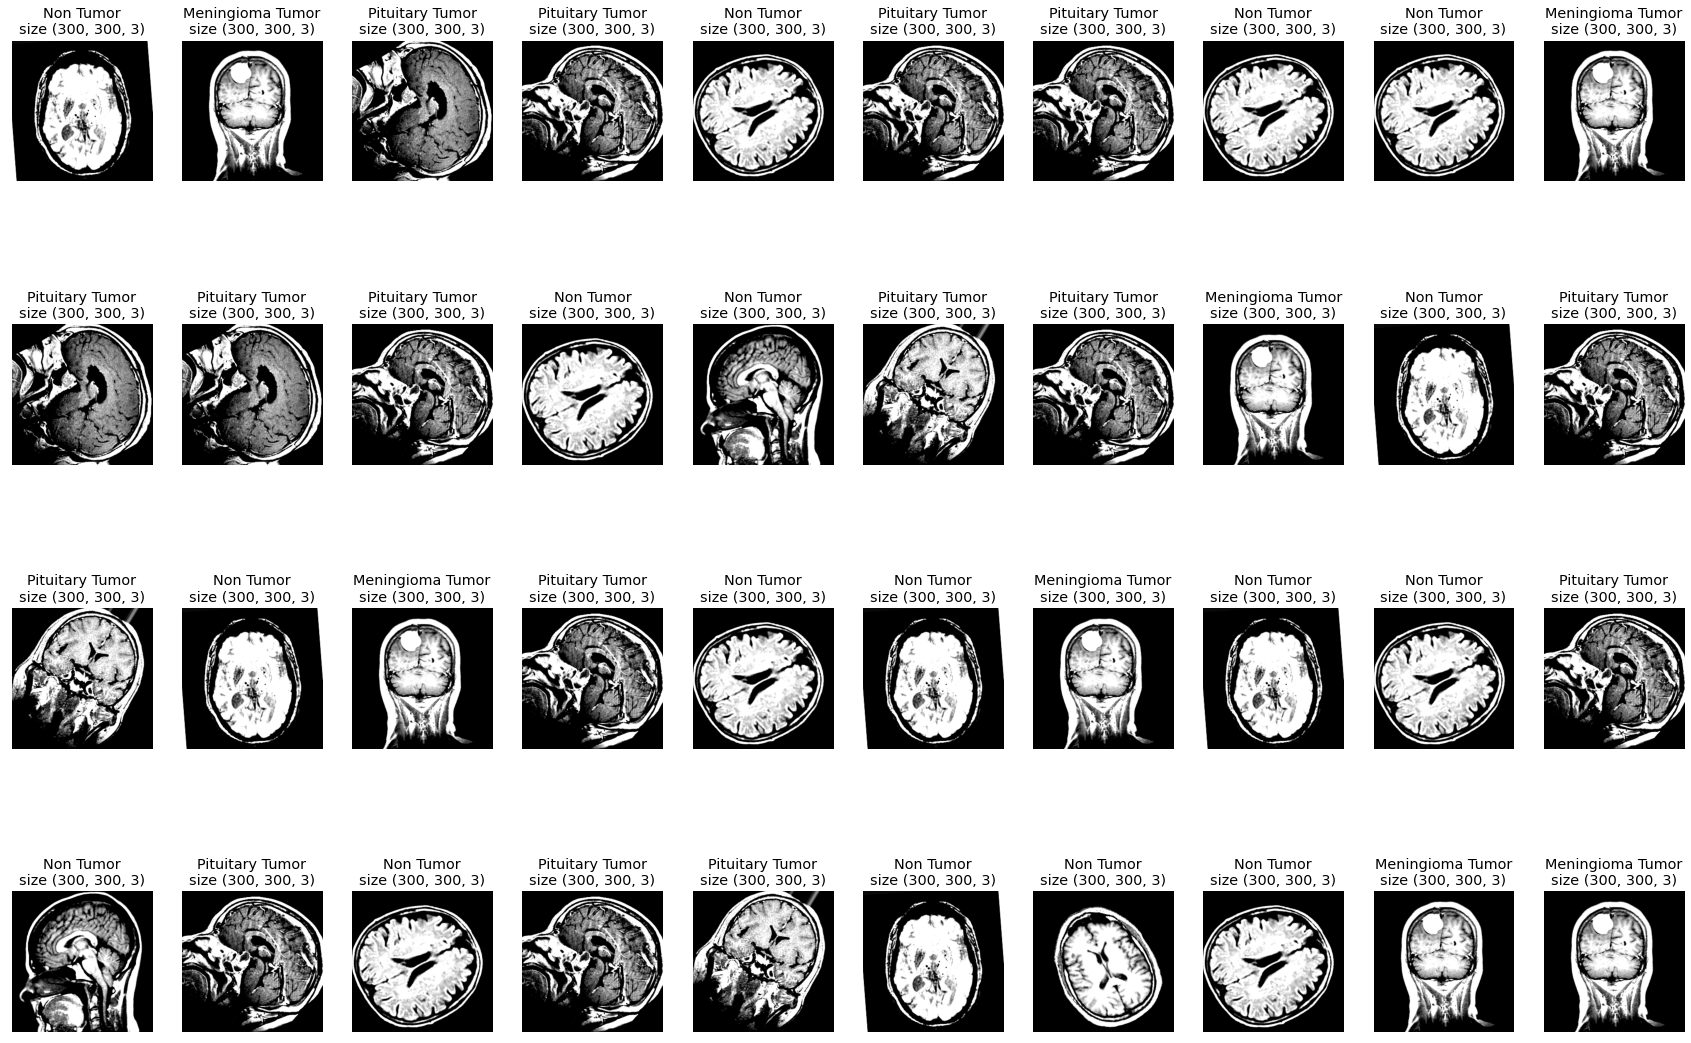

In [28]:
#converte labels to plot images
labels=[get_class(np.argmax(i)) for i in train_labels]

#show train generator
image_show(train_scans,labels,40)

**all is done data prepareation and data preprocessing  on scans and labels**

# Build Models

EfficientNetB3 and densenet169


# denenet_model

In [29]:
denenet_model=DenseNet201(weights="imagenet", include_top=False , input_shape=(ImageSize,ImageSize,3) )


for layer in denenet_model.layers[:150]:
    layer.trainable=False
    
    
denenet_model.summary()

74842112/74836368 [==============================] - 0s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
_______________________

__________________________________________________________________________________________________
conv5_block32_1_conv (Conv2D)   (None, 9, 9, 128)    241664      conv5_block32_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block32_1_bn (BatchNormal (None, 9, 9, 128)    512         conv5_block32_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block32_1_relu (Activatio (None, 9, 9, 128)    0           conv5_block32_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block32_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv5_block32_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block32_concat (Concatena (None, 9, 9, 1920)   0           conv5_block31_concat[0][0]       
          

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 306, 306, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

Total params: 83,544,132
Trainable params: 82,969,988
Non-trainable params: 574,144
__________________________________________________________________________________________________


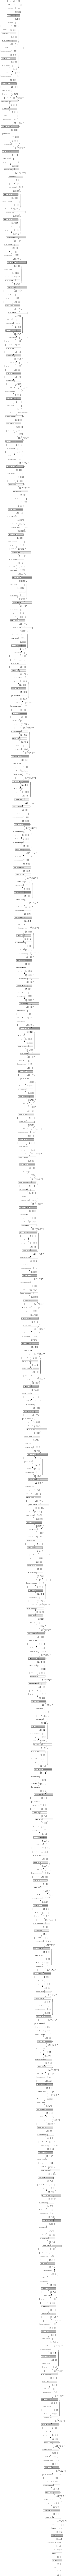

In [39]:
denenet_model=DenseNet201(weights="imagenet", include_top=False , input_shape=(ImageSize,ImageSize,3) )


for layer in denenet_model.layers[:150]:
    layer.trainable=False
    
    
# denenet_model.summary()



c=Conv2D(1024 , (5,5), padding="same" , activation="relu")(denenet_model.output)
c=Conv2D(512 , (5,5), padding="same" , activation="relu")(c)
c=Conv2D(64 , (5,5), padding="same" , activation="relu")(c)

p=GlobalAveragePooling2D()(c)

# Fine tuning  dense net model model

x=Dense(1024, activation="relu")(p)
x=Dense(1024, activation="relu")(x)

x=Dense(512, activation="relu")(x)
x=Dense(512, activation="relu")(x)

x=Dense(256, activation="relu")(x)
x=Dense(256, activation="relu")(x)

x=Dense(128, activation="relu")(x)

x=Dense(64, activation="relu")(x)

output=Dense(4, activation="softmax")(x)

model=Model(inputs=denenet_model.input , outputs=output)
model.summary()

#plot model
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True , to_file="model.png")

In [31]:
#callbacks
callbacks_denseNet=[
    tf.keras.callbacks.EarlyStopping(monitor="val_loss" , patience=5 , verbose=1),
    tf.keras.callbacks.ModelCheckpoint("denseNetModel.h5" , save_best_only=True ,verbose=1),
#     lr_rate
    
    ]

In [40]:
#training Densenet Model

# check t batch size is 8

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001 ,  epsilon=1e-07) , 
              loss=tf.keras.losses.categorical_crossentropy , 
              metrics=["accuracy"])

DenseNet_history=model.fit_generator(train_generator, 
          epochs= 20,  #+20 , i trained twice 20 epochs +  20 epochs
          steps_per_epoch=x_train.shape[0]/batch_size ,
          validation_data=val_generator ,callbacks=callbacks_denseNet,
          verbose=1)



Epoch 1/20
353/352 [==============================] - ETA: 0s - loss: 1.0063 - accuracy: 0.5303
Epoch 00001: val_loss did not improve from 0.10063
353/352 [==============================] - 93s 263ms/step - loss: 1.0063 - accuracy: 0.5303 - val_loss: 0.5809 - val_accuracy: 0.7248
Epoch 2/20
353/352 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.8201
Epoch 00002: val_loss did not improve from 0.10063
353/352 [==============================] - 89s 253ms/step - loss: 0.5217 - accuracy: 0.8201 - val_loss: 0.5547 - val_accuracy: 0.8255
Epoch 3/20
353/352 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8936
Epoch 00003: val_loss did not improve from 0.10063
353/352 [==============================] - 89s 252ms/step - loss: 0.3428 - accuracy: 0.8936 - val_loss: 0.2677 - val_accuracy: 0.9262
Epoch 4/20
353/352 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.9244
Epoch 00004: val_loss did not improve from 0.10063
353/352 [=

In [41]:
#evaluate 
print('evaluate')
model.evaluate(train_generator),model.evaluate(val_generator)

evaluate
5/5 [==============================] - 2s 460ms/step - loss: 0.2403 - accuracy: 0.9396


([0.14015503227710724, 0.9702022075653076],
 [0.24027059972286224, 0.9395973086357117])

- the Accuracy and Loss for DenseNet Model With 20 Epochs


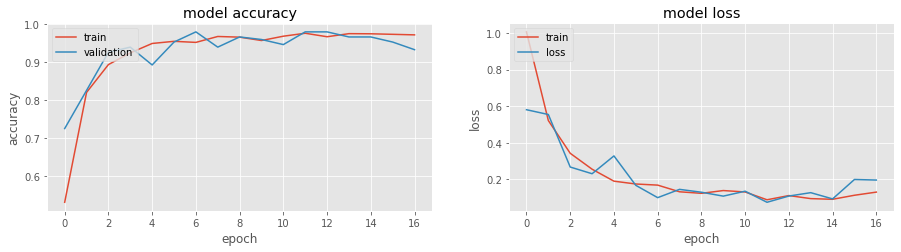

In [42]:
print("- the Accuracy and Loss for DenseNet Model With 20 Epochs")
plt.figure(figsize=(40,20))



# summarize history for accuracy 
plt.subplot(5,5,1)
plt.plot(DenseNet_history.history['accuracy'])
plt.plot(DenseNet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')



# summarize history for loss
plt.subplot(5,5,2)
plt.plot(DenseNet_history.history['loss'])
plt.plot(DenseNet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','loss'], loc='upper left')
plt.show()